In [2]:
from __future__ import division

import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta, date, time

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [6]:
training_traj = pd.read_csv('dataSet_phase2/trajectories(table_5)_training2.csv')
test_traj2 = pd.read_csv('dataSet_phase2/trajectories(table 5)_test2.csv')

In [32]:
training_path = 'dataSets/training/'
test_path1 = 'dataSets/testing_phase1/'

In [42]:
training_vol_old = pd.read_csv(training_path+'volume(table 6)_training.csv')
test_vol1 = pd.read_csv(test_path1+'volume(table 6)_test1.csv')

In [8]:
training_vol = pd.read_csv('dataSet_phase2/volume(table 6)_training2.csv')
test_vol2 = pd.read_csv('dataSet_phase2/volume(table 6)_test2.csv')

In [44]:
training_vol_old.columns = training_vol.columns

In [46]:
training_vol = pd.concat([training_vol_old, training_vol])

In [47]:
training_vol.head()

,date_time,direction,is_etc,model,tollgate,veh_type,window
0,2016-09-19 23:09:25,0,0,1,2,NaN,NaT
1,2016-09-19 23:11:53,0,0,1,2,NaN,NaT
2,2016-09-19 23:13:54,0,0,1,2,NaN,NaT
3,2016-09-19 23:17:48,0,1,1,1,NaN,NaT
4,2016-09-19 23:16:07,0,0,1,2,NaN,NaT


In [48]:
def time_to_window(x):
    dt = datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    dtmin = int(dt.minute / 20) * 20
    dtwindow = datetime(dt.year, dt.month, dt.day, dt.hour, dtmin, 0)
    return dtwindow


In [49]:
def format_window(wd):
    return '[{},{})'.format(str(wd), str(wd+timedelta(minutes=20)))

In [50]:
#training_traj['starting_datetime'] = pd.to_datetime(training_path['starting_time'])
training_traj['window'] = training_traj['starting_time'].apply(time_to_window)

training_traj_group_mean = \
training_traj.groupby(['intersection_id','tollgate_id','window']).mean()['travel_time']

training_traj_group_count = \
training_traj.groupby(['intersection_id','tollgate_id','window']).count()['travel_time']

In [51]:
training_vol['window'] = training_vol['date_time'].apply(time_to_window)

training_vol_group_count = \
training_vol.groupby(['tollgate','direction','window']).count()['date_time']


In [54]:
test_vol2['window'] = test_vol2['date_time'].apply(time_to_window)

test_vol_group_count = \
test_vol2.groupby(['tollgate','direction','window']).count()['date_time']

In [55]:
sample = pd.read_csv('/Users/yutao/Documents/Contest/tianchi/KDD_CUP2017/submission/submission_sample_volume.csv')

In [56]:
date_list = []

d1 = date(2016, 9, 19)  # start date
d2 = date(2016, 10, 24)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    date_list.append(d1 + timedelta(days=i))

give_time_list1 = [time(6,0), time(6,20), time(6,40), 
                   time(7,0), time(7,20), time(7,40)]
pred_time_list1 = [time(8,0), time(8,20), time(8,40), 
                   time(9,0), time(9,20), time(9,40)]

give_time_list2 = [time(15,0), time(15,20), time(15,40), 
                   time(16,0), time(16,20), time(16,40)]
pred_time_list2 = [time(17,0), time(17,20), time(17,40), 
                   time(18,0), time(18,20), time(18,40)]

In [57]:
date_list2 = []

d1 = date(2016, 10, 18)  # start date
d2 = date(2016, 10, 24)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    date_list2.append(d1 + timedelta(days=i))




In [58]:
def interpolate_missing_window(x):
    ss = [(i-datetime(1970,1,1)).total_seconds() for i in x.index]
    tt = x.values
    ssall = np.linspace(ss[0], ss[-1], (ss[-1]-ss[0])/1200+1)
    #print(len(ss), len(tt), len(ssall))
    ttall = np.interp(ssall, ss, tt)
    ssall = [int(i) for i in ssall]
    ssall = [datetime(1970,1,1)+timedelta(seconds=i) for i in ssall]
    return pd.Series(index=ssall, data=ttall)

In [59]:
first6 = np.array([])
next6 = np.array([])
for ti, d in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    mtmp = training_vol_group_count.loc[ti, d]
    #mtmp = interpolate_missing_window(mtmp)
    test6 = []
    for i in date_list:
        tmp = []
        for j in give_time_list1:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    first6 = np.append(first6, result6)
    
    test6 = []
    for i in date_list:
        tmp = []
        for j in pred_time_list1:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    next6 = np.append(next6, result6)

morning_volume66 = np.append(first6.reshape(-1,6), next6.reshape(-1,6), axis=1)

In [63]:
tiid = ['10']*36 + ['11']*36 + ['20']*36 + ['30']*36 + ['31']*36
dlid = date_list*5

In [64]:
first6 = np.array([])
next6 = np.array([])
for ti, d in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    mtmp = training_vol_group_count.loc[ti, d]
    #mtmp = interpolate_missing_window(mtmp)
    test6 = []
    for i in date_list:
        tmp = []
        for j in give_time_list2:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    first6 = np.append(first6, result6)
    
    test6 = []
    for i in date_list:
        tmp = []
        for j in pred_time_list2:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    next6 = np.append(next6, result6)

night_volume66 = np.append(first6.reshape(-1,6), next6.reshape(-1,6), axis=1)

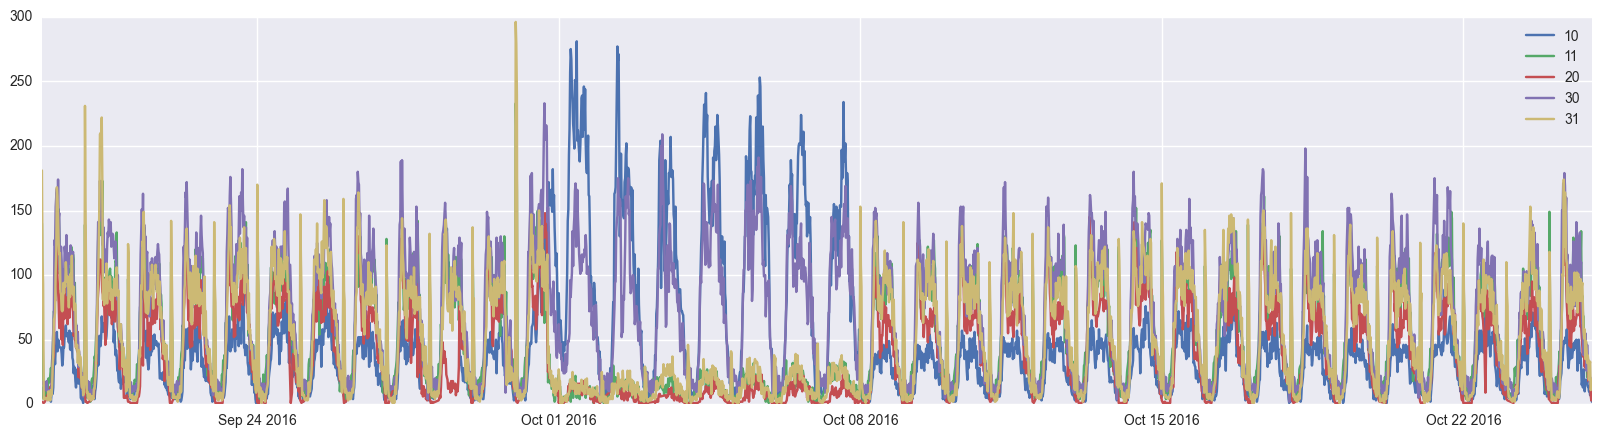

In [65]:
ttt10 = training_vol_group_count.loc[1, 0]
ttt11 = training_vol_group_count.loc[1, 1]
ttt20 = training_vol_group_count.loc[2, 0]
ttt30 = training_vol_group_count.loc[3, 0]
ttt31 = training_vol_group_count.loc[3, 1]

plt.figure(figsize=(20,5))
plt.plot(ttt10.index, ttt10)
plt.plot(ttt11.index, ttt11)
plt.plot(ttt20.index, ttt20)
plt.plot(ttt30.index, ttt30)
plt.plot(ttt31.index, ttt31)

plt.legend([10,11,20,30,31])

In [66]:
df_morning = pd.DataFrame(morning_volume66)

df_night = pd.DataFrame(night_volume66)

In [67]:
df_morning['ti'] = tiid
df_morning['dl'] = dlid
df_night['ti'] = tiid
df_night['dl'] = dlid

In [68]:
holiday_list = []

d1 = date(2016, 10, 1)  # start date
d2 = date(2016, 10, 7)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    holiday_list.append(d1 + timedelta(days=i))

In [69]:
df_morning2 = df_morning[~df_morning['dl'].isin(holiday_list)]
df_night2 = df_night[~df_night['dl'].isin(holiday_list)]

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
def pred_loss(x_pred, x_true):
    x_pred = np.array(x_pred).reshape(1,-1)
    x_true = np.array(x_true).reshape(1,-1)
    #print(x_true)

    return (abs(x_pred-x_true)/x_true).mean()

In [72]:
# atets = df_morning2.iloc[:,:6].values

In [73]:
# df_morning2.iloc[:,:6] = \
# np.array([np.convolve(i, [0.00,1,0.0], 'same') for i in atets])

In [74]:
df_morning2['wkwn'] = ([1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1]+[1,1,1,1,0,0,1])*5
df_morning2['wkwn'] *= 35

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [75]:
# df_morning2['ti'] = df_morning2['ti'].apply(str)

In [76]:
#df_morning2 = pd.get_dummies(df_morning2, columns=['ti'])

In [77]:
#df_morning2.iloc[:,-5:] = df_morning2.iloc[:,-5:] * 10

In [78]:
date_train = df_morning2['dl'].unique()[:-7]
df_morning2_train = df_morning2[df_morning2['dl'].isin(date_train)]
df_morning2_valid = df_morning2[~df_morning2['dl'].isin(date_train)]

In [79]:
#df_morning2_valid = df_morning2_valid[df_morning2_valid.index!=84]

In [80]:
X = df_morning2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_morning2_train.iloc[:,6:12]#.values

In [81]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, y)
for _ in range(3):
    y = 0.1*y + 0.9*neigh.predict(X)
    neigh.fit(X, y)
    

In [87]:
pred_loss(np.vectorize(round)(neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])-4), 
          df_morning2_valid.iloc[:,6:12])

0.1135065221579821

In [102]:
# neigh = KNeighborsRegressor(n_neighbors=12, 
#                             algorithm='brute',
#                             weights='distance',
#                             #metric=lambda a,b: wminkowski(a,b,2,wmink),
#                             #metric=lambda a, b: minkowski(a,b,2),
#                             metric= adjusted_minkowski
#                            )
# neigh.fit(X, y)
# for _ in range(0):
#     y = 0.1*y + 0.9*neigh.predict(X)
#     neigh.fit(X, y)
    

In [88]:
import copy

In [89]:
neigh_morning = copy.deepcopy(neigh)

In [90]:
# X = df_morning2_train.iloc[:,[0,1,2,3,4,5,-6]]#.values
# y = df_morning2_train.iloc[:,6]#.values

In [91]:
# neigh = KNeighborsRegressor(n_neighbors=5)
# neigh.fit(X, y)
# for _ in range(3):
#     y = 0.1*y + 0.9*neigh.predict(X)
#     neigh.fit(X, y)

In [92]:
# pred_loss(np.vectorize(round)(neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-6]])-4), 
#           df_morning2_valid.iloc[:,6])

In [93]:
X = df_morning2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_morning2_train.iloc[:,6]#.values

In [94]:
from sklearn import svm

clf = svm.SVR(C=0.1, epsilon=0.1)
clf.fit(X, y) 


SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [95]:
pred_loss(np.vectorize(round)(clf.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-6]])-4), 
          df_morning2_valid.iloc[:,6])

0.55543543905019932

In [96]:
clf.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-6]])

array([ 112.13333331,  112.13333331,  112.13333331,  112.13324212,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331])

In [97]:
npredm = neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])

In [98]:
ratio = (df_morning2_train.mean()[6:12])/sum(df_morning2_train.mean()[6:12])

In [99]:
ratio = np.array(ratio)

In [100]:
npredm2 = np.array([i.sum()*ratio for i in npredm])

In [101]:
pred_loss(npredm2, 
          df_morning2_valid.iloc[:,6:12])

0.12821884251394103

In [102]:
from scipy.spatial.distance import wminkowski, minkowski

In [103]:
wminkowski([1,2], [3,4], 2, [1,2])

4.4721359549995796

In [104]:
?KNeighborsRegressor

In [105]:
def adjusted_minkowski(a, b):
    dist = minkowski(a, b, 2)
    if dist > 1e-2:
        return dist
    return 1000

In [106]:
X = df_morning2_train.iloc[:,[0,1,2,3,4,5,-1]].values
y = df_morning2_train.iloc[:,6:12].values

#wmink = np.append(np.logspace(0,0,6), 1)

neigh = KNeighborsRegressor(n_neighbors=12, 
                            algorithm='brute',
                            weights='distance',
                            #metric=lambda a,b: wminkowski(a,b,2,wmink),
                            #metric=lambda a, b: minkowski(a,b,2),
                            metric= adjusted_minkowski
                           )
neigh.fit(X, y)


KNeighborsRegressor(algorithm='brute', leaf_size=30,
          metric=<function adjusted_minkowski at 0x10f8c2c80>,
          metric_params=None, n_jobs=1, n_neighbors=12, p=2,
          weights='distance')

In [109]:
pred_loss(np.vectorize(round)(neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])-4), 
          df_morning2_valid.iloc[:,6:12])

0.11711071895098754

In [110]:
npred = neigh_morning.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])
ntrue = df_morning2_valid.iloc[:,6:12].values


In [111]:
ntruef = ntrue.flatten()
npredf = npred.flatten()

In [112]:
((ntruef-npredf)**2/npredf*2/len(ntruef)).sum()

3.7692057747732131

In [113]:
# npred = neigh.predict(df_morning2_train.iloc[:,[0,1,2,3,4,5,-1]])
# ntrue = df_morning2_train.iloc[:,6:12].values

(array([  1.,   1.,   2.,   2.,   9.,  16.,  31.,  33.,  34.,  26.,  21.,
         15.,   8.,   6.,   3.,   1.,   0.,   1.]),
 array([-0.47264039, -0.41691217, -0.36118395, -0.30545573, -0.24972752,
        -0.1939993 , -0.13827108, -0.08254286, -0.02681464,  0.02891357,
         0.08464179,  0.14037001,  0.19609823,  0.25182645,  0.30755466,
         0.36328288,  0.4190111 ,  0.47473932,  0.53046753]),
 <a list of 18 Patch objects>)

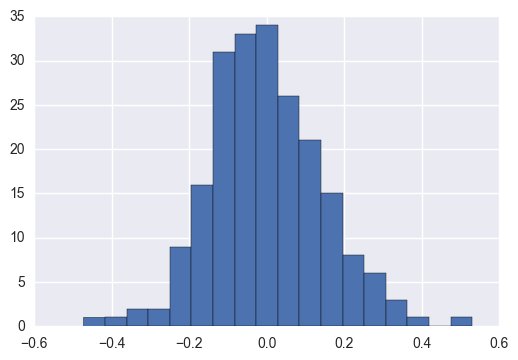

In [114]:
loss_ratio = ((ntrue-npred)/npred).flatten()
plt.hist(loss_ratio, bins=18)

In [115]:
(loss_ratio>0.4).reshape(-1,6).sum(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [116]:
df_morning2_valid[(loss_ratio>0.4).reshape(-1,6).sum(axis=1)>0]

,0,1,2,3,4,5,6,7,8,9,10,11,ti,dl,wkwn
179,23.0,41.0,60.0,75.0,101.0,99.0,174.0,122.0,164.0,152.0,113.0,109.0,31,2016-10-24,35


In [117]:
from scipy.stats import norm

In [118]:
norm.fit(loss_ratio, floc=0)

(0, 0.14591701387145453)

In [119]:
df_night2['wkwn'] = ([1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1]+[1,1,1,1,0,0,1])*5
df_night2['wkwn'] *= 55

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [120]:
date_train = df_night2['dl'].unique()[:-7]
df_night2_train = df_night2[df_night2['dl'].isin(date_train)]
df_night2_valid = df_night2[~df_night2['dl'].isin(date_train)]

In [121]:
X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_night2_train.iloc[:,6:12]#.values

neigh = KNeighborsRegressor(n_neighbors=12, weights='distance')
neigh.fit(X, y) 
pred_loss(np.vectorize(round)(neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]])*0.97), 
          df_night2_valid.iloc[:,6:12])

0.16297876598532449

In [122]:
pred_loss(np.vectorize(round)(neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]])-3), 
          df_night2_valid.iloc[:,6:12])

0.15631236092241449

In [127]:
X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_night2_train.iloc[:,6]#.values

neigh = KNeighborsRegressor(n_neighbors=12, weights='distance')
neigh.fit(X, y) 
pred_loss(np.vectorize(round)(neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]])*0.97), 
          df_night2_valid.iloc[:,6])

0.12104475081077898

In [128]:
X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_night2_train.iloc[:,6:12]#.values

wmink = np.append(np.logspace(0,0,6), 1)

neigh = KNeighborsRegressor(n_neighbors=12, 
                            algorithm='brute',
                            weights=lambda x: 1/x,
                            metric=lambda a,b: wminkowski(a,b,2,wmink))
neigh.fit(X, y)
    

KNeighborsRegressor(algorithm='brute', leaf_size=30,
          metric=<function <lambda> at 0x10fd3c8c0>, metric_params=None,
          n_jobs=1, n_neighbors=12, p=2,
          weights=<function <lambda> at 0x10fd3c320>)

In [129]:
def night_adjust(x):
    return round(x * (1 - 2/x))

In [140]:
pred_loss(np.vectorize(night_adjust)(neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]))-4, 
          df_night2_valid.iloc[:,6:12])

0.15330909982344348

In [139]:
pred_loss(np.vectorize(round)(neigh_morning.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])-4), 
          df_morning2_valid.iloc[:,6:12])

0.1135065221579821

In [132]:
neigh_night = copy.deepcopy(neigh)

In [133]:
npred = neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]])
ntrue = df_night2_valid.iloc[:,6:12].values

In [134]:
npredf = npred.flatten()
ntruef = ntrue.flatten()

In [135]:
((ntruef-npredf)**2/npredf*2/len(ntruef)).sum()

4.515412049371311

/Users/yutao/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


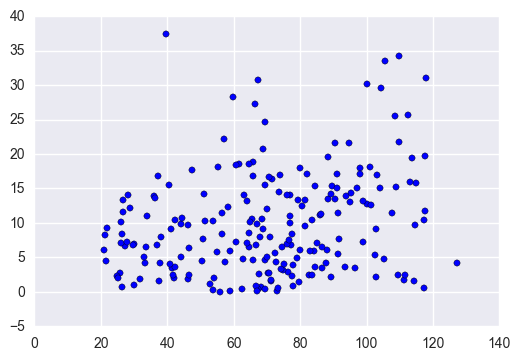

In [136]:
plt.scatter(npred.flatten(), np.abs(ntrue-npred).flatten())

(array([  2.,   5.,  11.,  25.,  38.,  34.,  36.,  24.,  12.,   9.,   7.,
          4.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.50167326, -0.42120683, -0.34074039, -0.26027396, -0.17980752,
        -0.09934109, -0.01887465,  0.06159178,  0.14205822,  0.22252465,
         0.30299109,  0.38345752,  0.46392396,  0.54439039,  0.62485683,
         0.70532326,  0.78578969,  0.86625613,  0.94672256]),
 <a list of 18 Patch objects>)

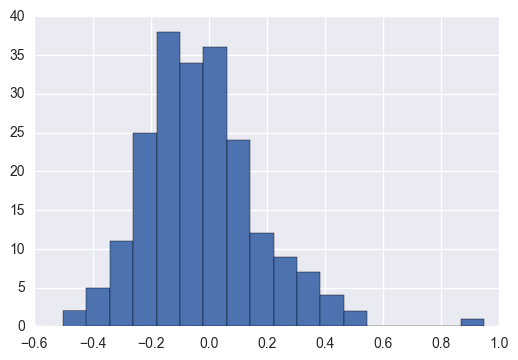

In [137]:
loss_ratio = ((ntrue-npred)/npred).flatten()
plt.hist(loss_ratio, bins=18)

In [138]:
norm.fit(loss_ratio, floc=0)

(0, 0.20113119528615875)

In [144]:
op = []
k = 35

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list(0.97*neigh_morning.predict(tvm).T.reshape(1,-1)[0])

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[1::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list(0.97*neigh_night.predict(tvm).T.reshape(1,-1)[0])

In [198]:
sample['volume'] = op

sample.to_csv('submission/submission_0503v.csv', index=False)

In [966]:
op = []
k = 35

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list((neigh_morning.predict(tvm)-3).T.reshape(1,-1)[0])

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[1::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list((neigh_night.predict(tvm)-3).T.reshape(1,-1)[0])

In [963]:
sample['volume'] = op

sample.to_csv('submission/submission_0504v.csv', index=False)

In [ ]:
op = []
k = 35

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list((neigh_morning.predict(tvm)-5).T.reshape(1,-1)[0])

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[1::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list((neigh_night.predict(tvm)-5).T.reshape(1,-1)[0])

In [998]:
sample['volume'] = op

sample.to_csv('submission/submission_0506v.csv', index=False)

In [968]:
op = []
k = 35

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list((neigh_morning.predict(tvm)-4).T.reshape(1,-1)[0])

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[1::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list((neigh_night.predict(tvm)-4).T.reshape(1,-1)[0])

In [969]:
sample['volume'] = op

sample.to_csv('submission/submission_0505v.csv', index=False)

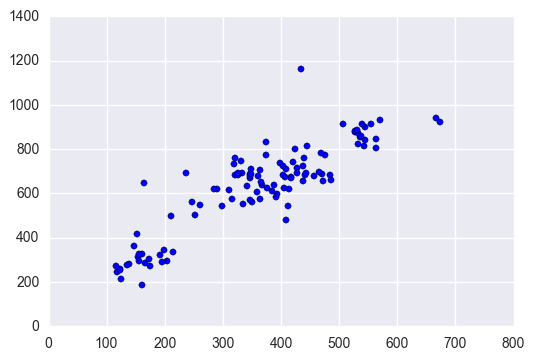

In [1531]:
plt.scatter(df_morning2.iloc[:,:6].sum(axis=1), df_morning2.iloc[:,6:12].sum(axis=1))

In [173]:
df_night2.loc[67]

0               11
1               15
2               10
3               18
4               29
5               76
6               56
7               79
8               69
9               43
10              54
11              52
ti              20
dl      2016-09-28
wkwn            35
Name: 67, dtype: object

In [163]:
df_night2.iloc[:,:6].sum(axis=1).sort_values()

67      159.0
20      252.0
21      253.0
19      255.0
24      266.0
23      267.0
7       273.0
22      278.0
2       280.0
28      289.0
8       289.0
0       291.0
3       318.0
10      328.0
26      340.0
1       361.0
5       372.0
6       384.0
77      386.0
4       397.0
78      399.0
27      404.0
25      408.0
59      422.0
79      430.0
65      431.0
81      432.0
66      444.0
86      445.0
61      446.0
        ...  
110     656.0
108     657.0
97      658.0
11      658.0
122     658.0
33      660.0
109     664.0
89      667.0
96      669.0
140     670.0
121     673.0
120     683.0
94      686.0
56      687.0
87      691.0
95      691.0
54      693.0
107     696.0
90      725.0
111     729.0
88      744.0
114     760.0
113     781.0
143     784.0
93      806.0
69      826.0
112     837.0
92      847.0
91      934.0
98     1162.0
dtype: float64

In [162]:
(116+118+123+123+124)/5

120.8

In [171]:
test_vol_group_count.loc[3].loc[1].reshape(-1,6)[1::2].sum(axis=1)

array([514, 532, 543, 583, 505, 633, 515])

In [1294]:
op = []
k = 35

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    if (i, j) != (1, 0):
        op += list((neigh_morning.predict(tvm)-4).T.reshape(1,-1)[0])
    else:
        predtmp = neigh_morning.predict(tvm)
        predtmp[4] = predtmp[4] * 112 / 125.6
        predtmp[5] = predtmp[5] * 102 / 125.6
        op += list((predtmp-4).T.reshape(1,-1)[0])

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[1::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list((neigh_night.predict(tvm)-4).T.reshape(1,-1)[0])

In [1295]:
sample['volume'] = op

sample.to_csv('submission/submission_0516v.csv', index=False)

In [262]:
op = []

k = 35

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    if (i, j) != (1, 0):
        op += list((neigh_morning.predict(tvm)-4).T.reshape(1,-1)[0])
    else:
        predtmp = neigh_morning.predict(tvm)
        predtmp[4] = predtmp[4] * 112 / 120.8
        predtmp[5] = predtmp[5] * 102 / 120.8
        op += list((predtmp-4).T.reshape(1,-1)[0])

k = 55      
        
for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[1::2]
    tvm = np.concatenate([tvm, [[k],[k],[k],[k],[0],[0],[k]]], axis=1)
    op += list((neigh_night.predict(tvm)-4).T.reshape(1,-1)[0])

In [263]:
sample['volume'] = op

sample.to_csv('submission/submission_0523v.csv', index=False)

In [665]:
df_morning2_valid.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,wkwn
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,24.828571,36.657143,51.285714,67.800000,82.600000,92.542857,100.714286,106.628571,110.285714,107.485714,100.542857,93.142857,25.000000
std,10.664636,13.588366,23.447779,31.796966,33.962956,37.016962,39.767391,36.972236,39.023049,33.110662,28.289827,29.550697,16.042224
min,6.000000,7.000000,0.000000,0.000000,27.000000,30.000000,29.000000,44.000000,35.000000,43.000000,46.000000,34.000000,0.000000
25%,17.000000,29.000000,35.000000,40.000000,51.500000,61.500000,76.500000,80.000000,92.500000,97.500000,93.000000,74.500000,0.000000
50%,24.000000,39.000000,54.000000,72.000000,79.000000,92.000000,107.000000,111.000000,121.000000,112.000000,107.000000,98.000000,35.000000
75%,32.500000,45.000000,66.500000,91.000000,108.000000,119.000000,126.000000,132.500000,134.000000,127.000000,116.500000,115.500000,35.000000
max,45.000000,68.000000,95.000000,145.000000,162.000000,165.000000,175.000000,182.000000,180.000000,161.000000,150.000000,152.000000,35.000000


In [664]:
df_night2_valid.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,wkwn
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,89.771429,92.542857,88.971429,92.857143,93.628571,91.314286,90.628571,91.228571,86.371429,67.085714,66.085714,56.114286,25.000000
std,28.768943,27.110170,26.510249,28.370597,25.323885,27.138828,27.041456,32.079025,34.166621,25.509366,22.553689,20.619482,16.042224
min,37.000000,43.000000,33.000000,41.000000,42.000000,42.000000,39.000000,26.000000,24.000000,22.000000,24.000000,14.000000,0.000000
25%,74.000000,78.500000,74.000000,70.000000,79.000000,73.000000,76.000000,73.000000,66.000000,47.000000,53.500000,40.500000,0.000000
50%,93.000000,92.000000,89.000000,90.000000,94.000000,91.000000,89.000000,93.000000,90.000000,71.000000,70.000000,57.000000,35.000000
75%,108.500000,107.500000,107.000000,111.500000,114.000000,105.000000,111.500000,120.000000,112.500000,88.000000,83.500000,72.000000,35.000000
max,140.000000,159.000000,137.000000,144.000000,135.000000,149.000000,146.000000,139.000000,135.000000,125.000000,109.000000,99.000000,35.000000


In [986]:
from sklearn.decomposition import PCA

In [991]:
pca = PCA()
pca.fit(df_night2.iloc[:,:6])

PCA(copy=True, n_components=None, whiten=False)

In [992]:
pca.components_

array([[ 0.37872265,  0.3976921 ,  0.40932576,  0.43316427,  0.3947647 ,
         0.43288812],
       [ 0.5479476 ,  0.25093885,  0.05990307,  0.17947525, -0.2235362 ,
        -0.74230381],
       [-0.45182228, -0.38759207,  0.34969856,  0.56851206,  0.2467298 ,
        -0.37317338],
       [ 0.40910238, -0.53998244,  0.40779711, -0.49507521,  0.35249739,
        -0.07349724],
       [-0.17394916,  0.10099201,  0.71122249, -0.14620048, -0.64603849,
         0.12232974],
       [ 0.39313629, -0.57171903, -0.18557761,  0.43643709, -0.43783177,
         0.31932453]])

In [996]:
dfnpca = pca.transform(df_night2.iloc[:,:6])

In [70]:
training_weather = pd.read_csv('weather (table 7)_training_update.csv')

In [80]:
training_weather['datetime'] = \
    [datetime(int(i[:4]), int(i[5:7]), int(i[8:10]), j) for i, j in \
         zip(training_weather['date'], training_weather['hour'])]

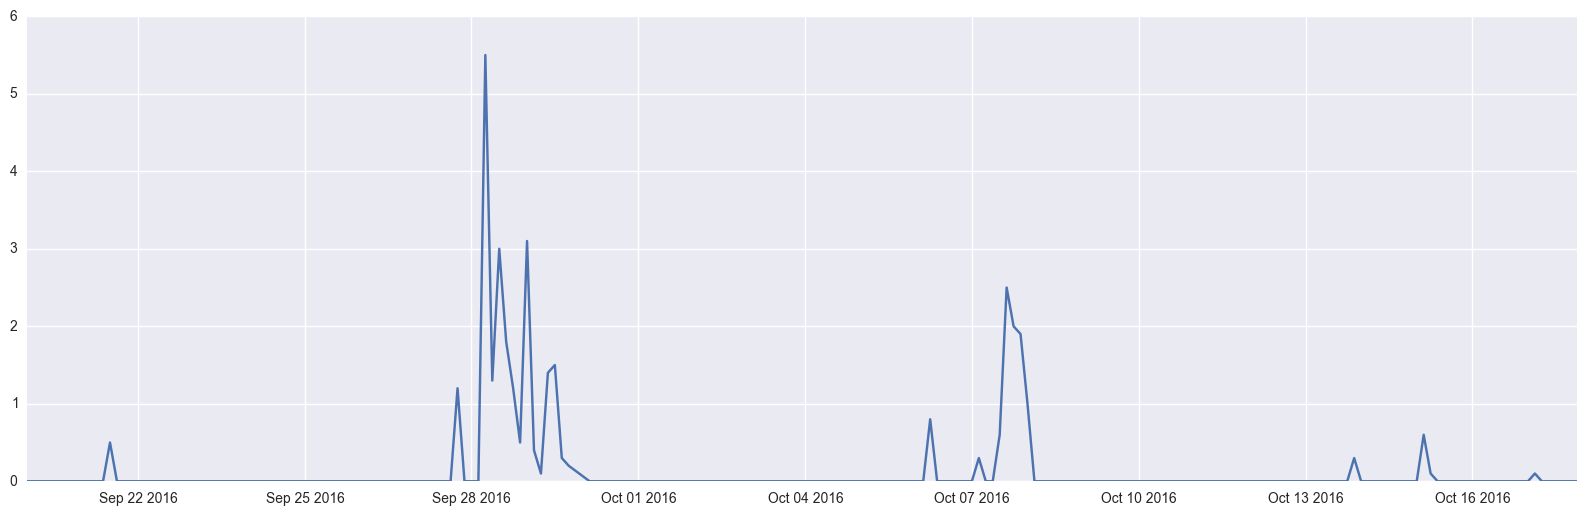

In [94]:
wt = training_weather.iloc[648:]

plt.figure(figsize=(20,6))
plt.plot(wt['datetime'], wt['precipitation'])

In [139]:
X1 = np.array([[1,2],[3,4],[5,3],[2,3]])

In [140]:
X2 = np.array([[1,7],[5,5],[4,3]])

In [141]:
m = np.array([1,2])
n = np.array([2,7])

In [151]:
((m-n)**2).sum()

26

In [145]:
fsf=None

In [272]:
def f(y=5, x):
    return x*y

SyntaxError: non-default argument follows default argument (<ipython-input-272-995ee8d9c80a>, line 1)

In [271]:
f(2)

NameError: global name 'x' is not defined

# Self-written KNN

In [239]:
class KNeighborsRegressor_M():
    def __init__(self, n_neighbors=5, weights='uniform', 
                 distance_weights=None):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.distance_weights = distance_weights

        
    def fit(self, X, y):
        self._fit_X = X
        self._fit_y = y
    
    @staticmethod
    def distance_metric(m, n, dw):
        m = np.array(m)
        n = np.array(n)
        if dw != None:
            try:
                return np.sqrt(((m-n)**2*np.array(dw)).sum())
            except:
                raise ValueError('Check distance_weights')
        return np.sqrt(((m-n)**2).sum())
    
    def distance_matrix(self, X1, X2):
        dmatrix = \
            [[KNeighborsRegressor_M.distance_metric(
                        i, j, self.distance_weights) 
              for i in X1] for j in X2]
        dmatrix = np.array(dmatrix)
        return dmatrix
    
    def predict(self, X):
        _dmatrix = self.distance_matrix(self._fit_X, X)
        nn = min(self.n_neighbors, self._fit_X.shape[0])
        nn_dist_matrix = np.array([np.partition(i, 2)[:2] for i in _dmatrix])
        nn_arg_matrix = np.array([np.argpartition(i, 2)[:2] for i in _dmatrix])
        
        
        return None
    
    
    

In [244]:
dm = KNeighborsRegressor_M(distance_weights=None).distance_matrix(X1, X2)
dm

array([[ 5.        ,  3.60555128,  5.65685425,  4.12310563],
       [ 5.        ,  2.23606798,  2.        ,  3.60555128],
       [ 3.16227766,  1.41421356,  1.        ,  2.        ]])

In [235]:
np.array([np.partition(i, 2)[:2] for i in dm])

array([[ 3.60555128,  4.12310563],
       [ 2.        ,  2.23606798],
       [ 1.        ,  1.41421356]])

In [234]:
[np.argpartition(i, 2)[:2] for i in dm]

[array([1, 3]), array([2, 1]), array([2, 1])]

In [229]:
np.argpartition(test, 4)[:4]

array([9, 1, 6, 2])

In [230]:
np.partition(test, 4)[:4]

array([0, 1, 1, 3])

In [231]:
?np.partition